# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_inner = pd.merge(left = mouse_metadata, right = study_results, left_on ='Mouse ID', right_on = 'Mouse ID')

# Display the data table for preview
merged_data_inner.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_mice = merged_data_inner['Mouse ID'].unique()
print(len(number_mice))


249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_merged_two = pd.DataFrame(merged_data_inner, columns=['Mouse ID', 'Timepoint'])
duplicates = duplicated_merged_two[duplicated_merged_two[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicates

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = merged_data_inner[merged_data_inner['Mouse ID'].duplicated()]
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_dropped = merged_data_inner.drop_duplicates(subset = ['Mouse ID'])
new_dropped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(new_dropped))

249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
merged_data_inner.rename(columns={'Tumor Volume (mm3)': 'volume'}, inplace=True)
df1 = pd.DataFrame(merged_data_inner)
df1.groupby('Drug Regimen')['volume'].agg(['mean', 'median', 'var', 'std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary = merged_data_inner.groupby('Drug Regimen')['volume'].describe()
summary.head()
# new_df_final

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817


## Bar and Pie Charts

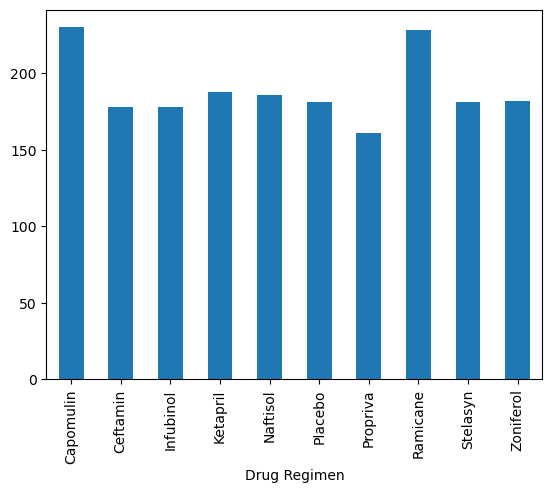

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df = merged_data_inner.groupby('Drug Regimen')['Mouse ID'].count()
plot = df.plot.bar(x='drugs', y='rows')


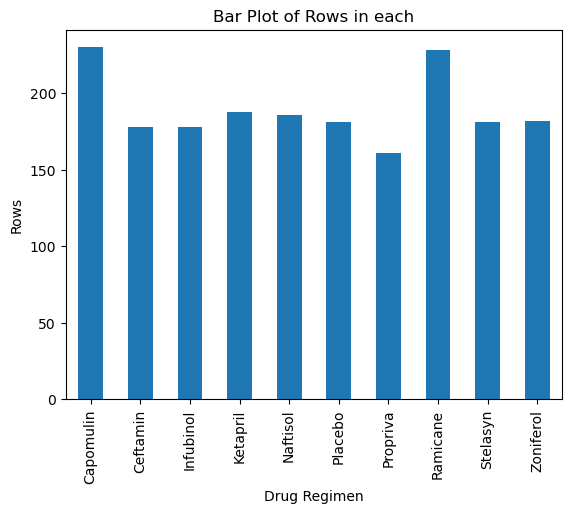

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df = merged_data_inner.groupby('Drug Regimen')['Mouse ID'].count()
df.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Rows')
plt.title('Bar Plot of Rows in each')
plt.show()

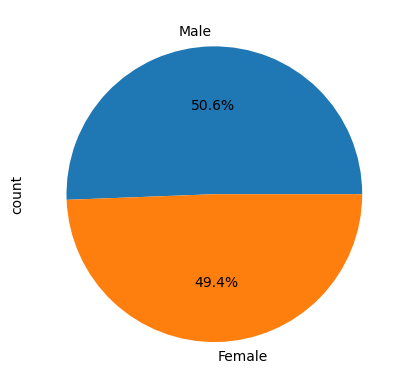

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
df = pd.DataFrame(merged_data_inner)
data = df['Sex'].value_counts()
plot = data.plot(kind='pie', autopct='%1.1f%%')


<function matplotlib.pyplot.show(close=None, block=None)>

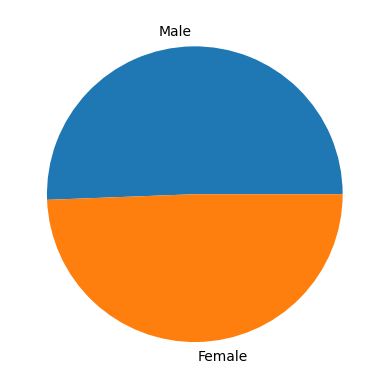

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
df = pd.DataFrame(merged_data_inner)
data = df['Sex'].value_counts()
labels = df['Sex'].unique()
# Make the pie chart
plt.pie(data, labels=labels)
plt.show

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
df = pd.DataFrame(merged_data_inner)
last_timepoint_df = df.groupby('Mouse ID').last().reset_index()
final_tumor_volumes = pd.merge(last_timepoint_df,df, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volumes

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,volume_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,volume_y,Metastatic Sites_y
0,a203,Infubinol,Female,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4,Placebo,Female,17,29,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0,Propriva,Female,12,26,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0,Ramicane,Male,11,16,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3,Infubinol,Female,24,25,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_list:
    tumor_volume = final_tumor_volumes[final_tumor_volumes['Drug Regimen_x'] == treatment]['volume_x']
    tumor_data.append(tumor_volume)
    print(tumor_data)
# Q1 = np.percentile(sort_data, 25)
# Q3 = np.percentile(sort_data, 75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# potential_outliers = sort_data[(sort_data < lower_bound) | (final_tumor_volumes > upper_bound)]
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # Determine outliers using upper and lower bounds


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
